In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year_ago_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago_date)

2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
date_scores = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23').\
        order_by(Measurement.date).all()
date_scores

# Save the query results as a Pandas DataFrame and set the index to the date column
date_scores_df = pd.DataFrame(data=date_scores)
date_scores_df

# Sort the dataframe by date
date_sorted_df = date_scores_df.set_index("date")
date_sorted_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


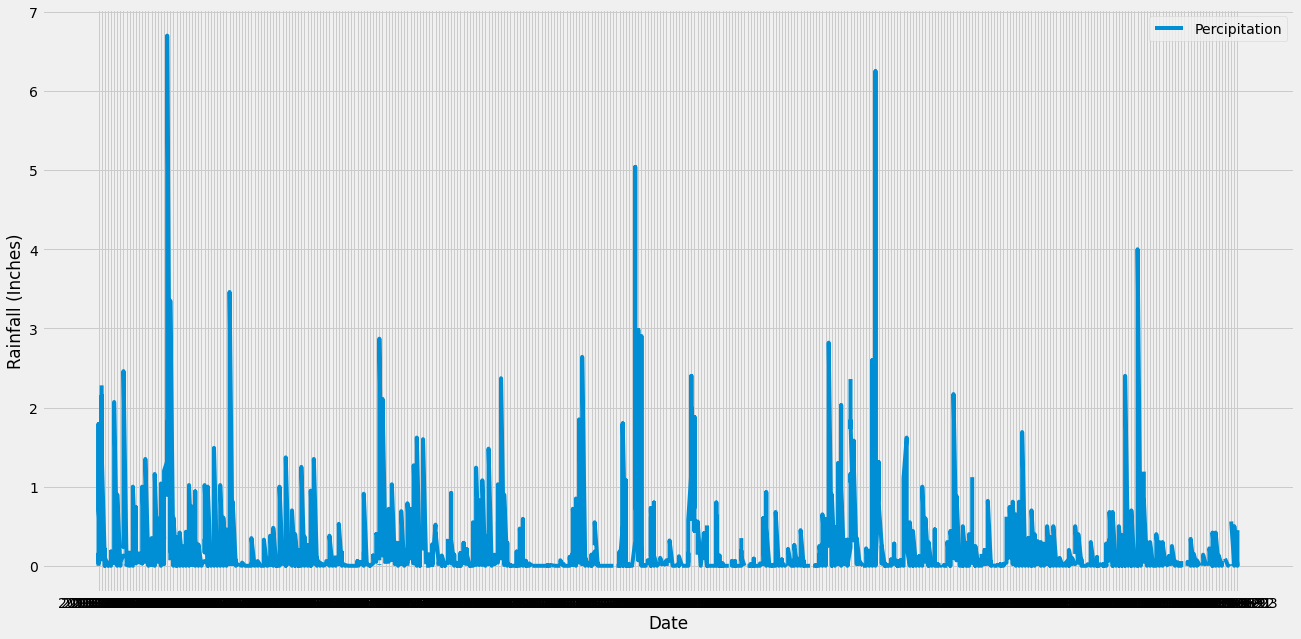

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
bar_graph =pd.DataFrame(data=date_scores_df)
plt.figure(figsize = (20,10))
plt.plot(bar_graph['date'], bar_graph['prcp'])
plt.xlabel('Date')
plt.ylabel('Rainfall (Inches)')
plt.legend(['Percipitation'])
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_scores_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
total_number_s = session.query(func.count(Station.station)).all()
print("There are " + str(total_number_s) + " stations available in this dataset.")

There are [(9,)] stations available in this dataset.


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_s = session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
most_active_s

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_obvs = session.query(Measurement.station)\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.tobs).desc()).first()
print(str(most_obvs) + " has the highest number of observations.")

('USC00519281',) has the highest number of observations.


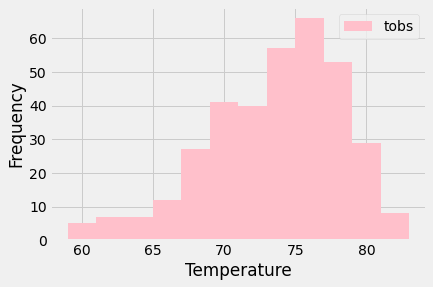

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = session.query(Measurement.tobs).\
                                filter(Measurement.station=='USC00519281').\
                                filter(Measurement.date >= one_year_ago_date).\
                                order_by(Measurement.date.desc()).all()

x = [x[0] for x in histogram]


plt.hist(x, bins=12 , color ='pink')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend(['tobs'])
plt.show()

# Close session

In [18]:
# Close Session
session.close()